In [1]:
from src.topoexplainer import TopoExplainer
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier # for building the model
import scipy.stats as ss
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


# Build some toy example

In [2]:
n_pts = 2000
dim_pts = 4

points = ss.uniform().rvs((n_pts, dim_pts))
y_train = 2*points[:, 0] -4*points[:, 1] + 7*points[:, 2] -points[:, 3] + 10*points[:, 0]*points[:, 1] + 0.1*points[:, 3]**2
# add gausian noise
noise = ss.norm().rvs(n_pts)
y_train += noise
X_train = pd.DataFrame(points, columns=[f'X{i}' for i in range(dim_pts)])
X_train

,X0,X1,X2,X3
0,0.361832,0.819132,0.932341,0.389867
1,0.893608,0.291233,0.888013,0.054247
2,0.820670,0.254457,0.591205,0.233845
3,0.349640,0.444222,0.933591,0.502145
4,0.998530,0.598128,0.047590,0.556090
...,...,...,...,...
1995,0.886185,0.678321,0.993236,0.732040
1996,0.342628,0.292332,0.893434,0.069081
1997,0.997422,0.913130,0.941161,0.068591
1998,0.211140,0.773594,0.683090,0.756093


## Train linear Regression and RandomForest

In [3]:
model = RandomForestRegressor(n_estimators = 10, random_state = 0)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

## Use SHAP values

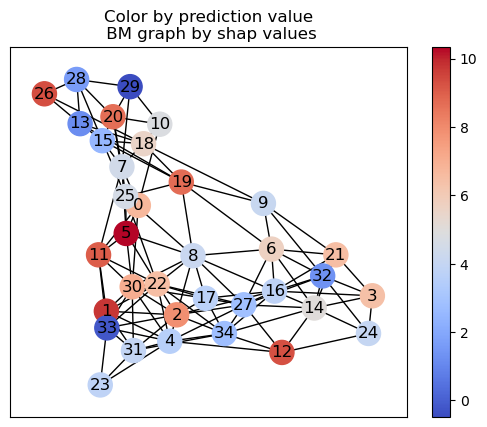

In [4]:
te = TopoExplainer(model=model, data=X_train)
te.explain_shap_space(eps=1.5)
te.plot_explainability_graph()

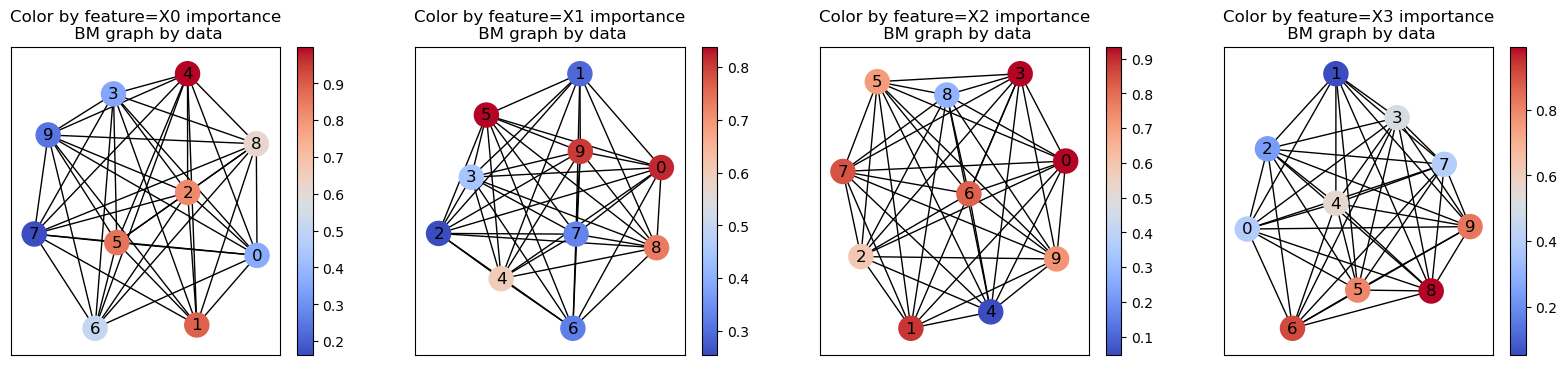

In [5]:
te.explain_data_space(eps=0.75)
fig, axs = plt.subplots(1, X_train.shape[1], figsize=(20, 4))
for ax, feature in zip(axs, X_train.columns):
    te.plot_explainability_graph(feature=feature, ax=ax)

## Use absolute SHAP values

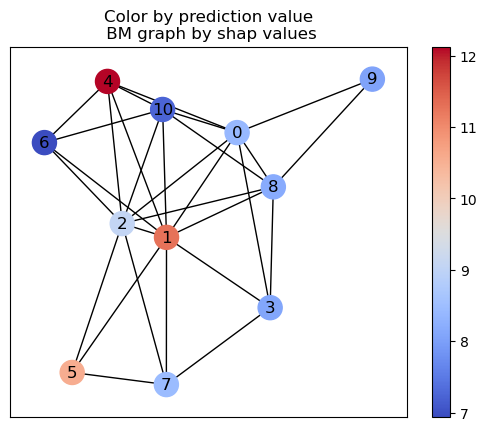

In [6]:
te_abs = TopoExplainer(model=model, data=X_train, use_absolute_shap=True)
te_abs.explain_shap_space(eps=1.5)
te_abs.plot_explainability_graph()

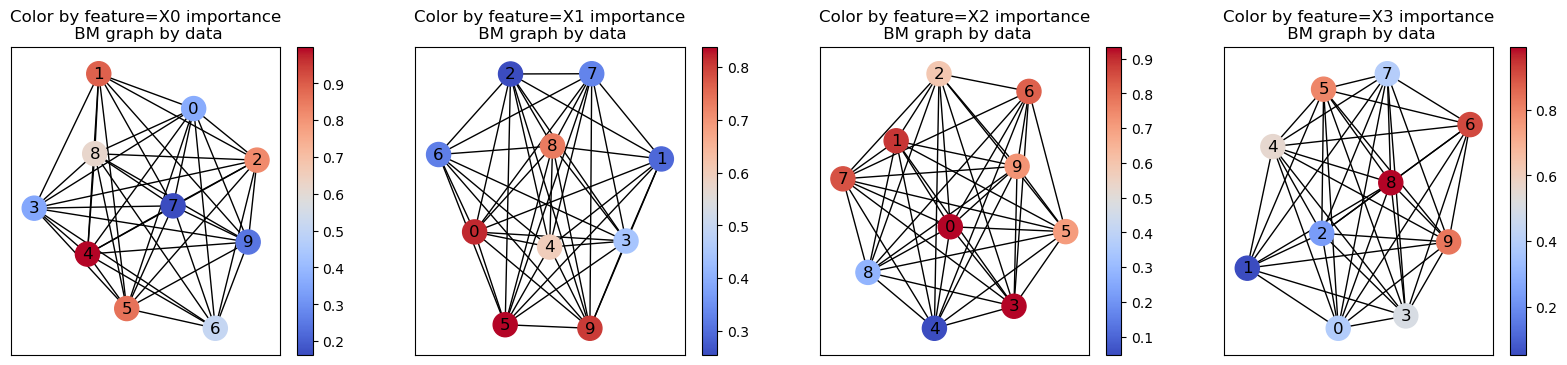

In [7]:
te_abs.explain_data_space(eps=0.75)
fig, axs = plt.subplots(1, X_train.shape[1], figsize=(20, 4))
for ax, feature in zip(axs, X_train.columns):
    te_abs.plot_explainability_graph(feature=feature, ax=ax)

# Some real data
## Regression
https://archive.ics.uci.edu/dataset/60/liver+disorders

In [8]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
liver_disorders = fetch_ucirepo(id=60) 
  
# data (as pandas dataframes) 
X = liver_disorders.data.features 
y = liver_disorders.data.targets
y = y.values.ravel()
  
# metadata 
print(liver_disorders.metadata) 
  
# variable information 
print(liver_disorders.variables) 

{'uci_id': 60, 'name': 'Liver Disorders', 'repository_url': 'https://archive.ics.uci.edu/dataset/60/liver+disorders', 'data_url': 'https://archive.ics.uci.edu/static/public/60/data.csv', 'abstract': 'BUPA Medical Research Ltd. database donated by Richard S. Forsyth', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 345, 'num_features': 5, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['drinks'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2016, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C54G67', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'The first 5 variables are all blood tests which are thought to be sensitive to liver disorders that might arise from excessive alcohol consumption. Each line in the dataset constitutes the record of a single male individual.\n\nImportant note: The 7

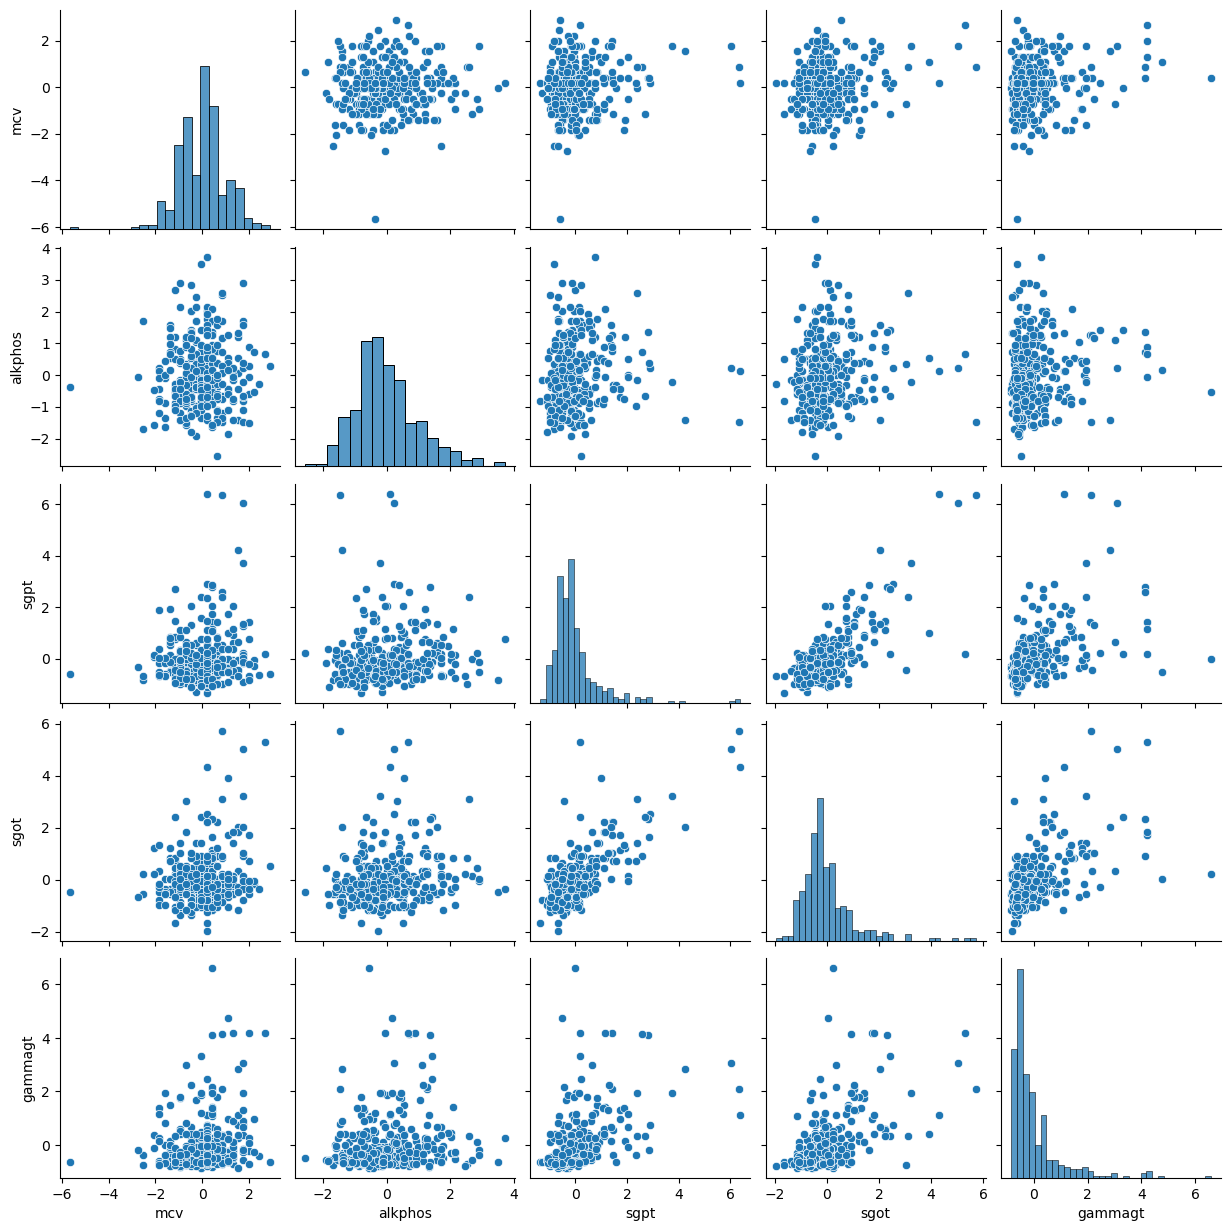

In [9]:
# Standarize input data
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns)
sns.pairplot(X_scaled)

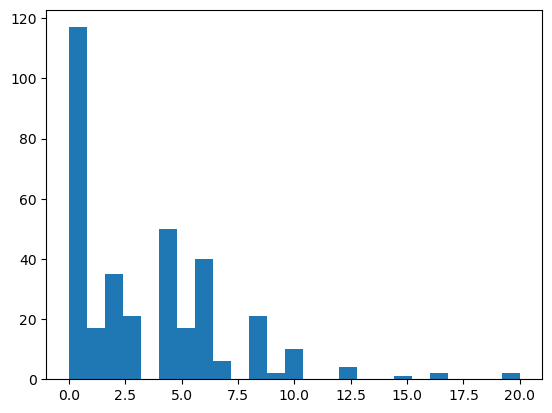

In [10]:
_ = plt.hist(y, bins=25)

In [11]:
# fit Linear Regression and RandomForest
lr = LinearRegression()
lr.fit(X_scaled, y)

rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf.fit(X_scaled, y)

RandomForestRegressor(n_estimators=10, random_state=0)

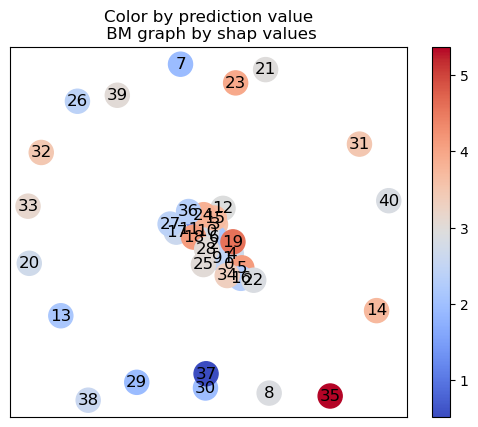

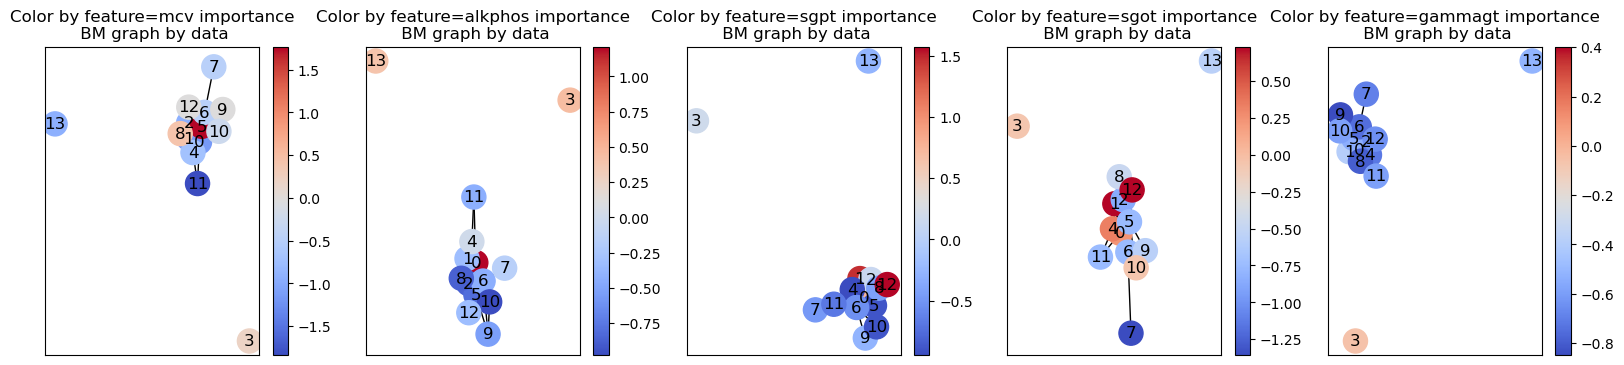

In [12]:
te_lr = TopoExplainer(model=lr, data=X_scaled)
te_lr.explain_shap_space(eps=.75)
te_lr.plot_explainability_graph()
te_lr.explain_data_space(eps=3)
fig, axs = plt.subplots(1, X_scaled.shape[1], figsize=(20, 4))
for ax, feature in zip(axs, X_scaled.columns):
    te_lr.plot_explainability_graph(feature=feature, ax=ax)

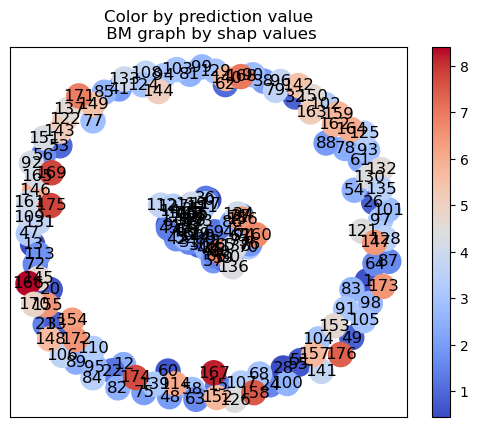

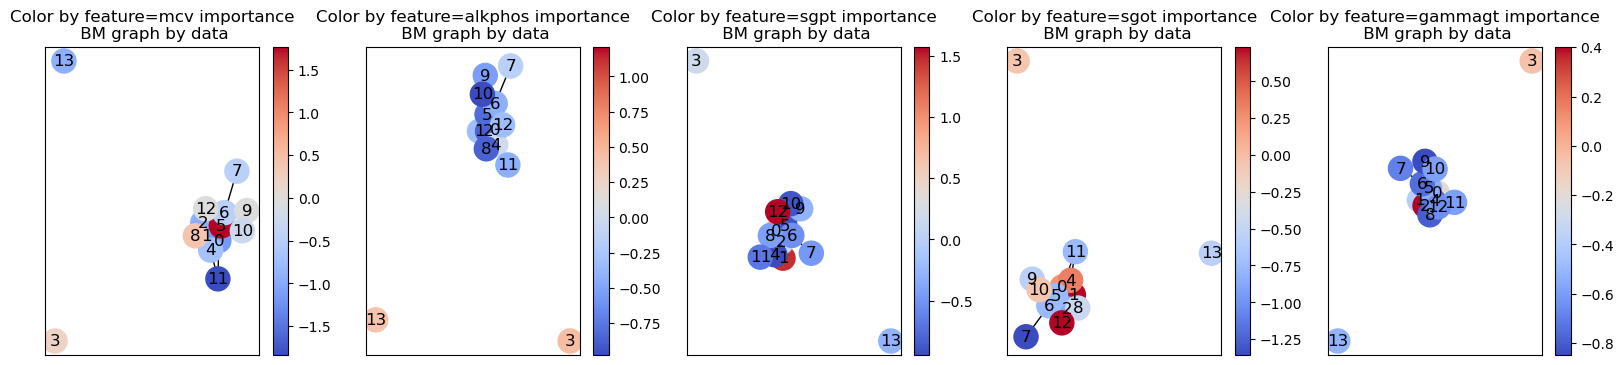

In [13]:
te_rf = TopoExplainer(model=rf, data=X_scaled)
te_rf.explain_shap_space(eps=.5)
te_rf.plot_explainability_graph()
te_rf.explain_data_space(eps=3)
fig, axs = plt.subplots(1, X_scaled.shape[1], figsize=(20, 4))
for ax, feature in zip(axs, X_scaled.columns):
    te_rf.plot_explainability_graph(feature=feature, ax=ax)